In [1]:
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get list of cells from website and list of reconstructions

ctc = CellTypesCache()
cells = ctc.get_cells()

#make a dictionary of all the cells with the Ephys ROI Result ID as the key
cell_index = { c['ephys_result_id']: c for c in cells}

#or make it into a dataframe setting the dictionary keys to being the index of the dataframe
df=pd.DataFrame.from_dict(cell_index, orient='index')

In [3]:
#we can look at our new dataframe and explore the data
df.head(5)

,rna_integrity_number,weight,parent_y_coord,dendrite_type,has_morphology,parent_x_coord,ephys_result_id,data_sets,is_cell_specimen,cell_soma_locations,...,structure_id,structure,parent_z_coord,apical,name,specimen_tags,has_reconstruction,specimen_id_path,donor_id,external_specimen_name
313860731,None,9000,0,spiny,True,0,313860731,"[{u'name': u'T301-Ax.141222_02_D05_313860745',...",True,"[{u'normalized_depth': 0.629235722633, u'speci...",...,778,"{u'st_level': None, u'graph_id': 1, u'name': u...",1,truncated,Rorb-IRES2-Cre-D;Ai14-168047.01.02.01,"[{u'ar_association_key_name': u'469763389', u'...",False,/313401570/313835977/313837005/313860745/,313401568,None
313861409,None,9000,0,aspiny,False,0,313861409,[],True,"[{u'normalized_depth': 0.416697482179, u'speci...",...,501,"{u'st_level': None, u'graph_id': 1, u'name': u...",1,NA,Pvalb-IRES-Cre;Ai14-165172.05.02.01,"[{u'ar_association_key_name': u'566559909', u'...",False,/312883119/313174438/313177534/313861411/,312883117,None
313861536,None,9000,0,aspiny,True,0,313861536,"[{u'name': u'T301-Ax.141216_01_D05_313861539',...",True,"[{u'normalized_depth': 0.530617180204, u'speci...",...,721,"{u'st_level': None, u'graph_id': 1, u'name': u...",1,NA,Pvalb-IRES-Cre;Ai14-165171.06.02.01,"[{u'ar_association_key_name': u'566559909', u'...",False,/312883107/313121788/313138741/313861539/,312883105,None
313861603,None,9000,0,aspiny,True,0,313861603,"[{u'name': u'T301-Ax.141216_02_A02_313861608',...",True,"[{u'normalized_depth': 0.634578644377, u'speci...",...,778,"{u'st_level': None, u'graph_id': 1, u'name': u...",1,NA,Pvalb-IRES-Cre;Ai14-165874.04.02.01,"[{u'ar_association_key_name': u'566559909', u'...",True,/312883131/313324567/313329291/313861608/,312883129,None
313861675,None,9000,0,spiny,True,0,313861675,"[{u'name': u'T301-Ax.141216_02_A04_313861677',...",True,"[{u'normalized_depth': 0.513310084338, u'speci...",...,721,"{u'st_level': None, u'graph_id': 1, u'name': u...",1,truncated,Rorb-IRES2-Cre-D;Ai14-166229.04.01.01,"[{u'ar_association_key_name': u'469763389', u'...",False,/312883179/313400174/313400524/313861677/,312883177,None


In [4]:
#let's see how many cells there are
print 'Cells in Database', len(df)
print 'Cells with Reconstructions', len(df[df['has_reconstruction'] == True])

Cells in Database 1058
Cells with Reconstructions 295


In [5]:
#get the name of the slice that the cell came from
df['slice'] = None
for i in range(len(df)):
    df['slice'].iloc[i] = df['name'].iloc[i].split('-')[-1][:-3]

In [6]:
#load pwa log as csv
pwa_log = pd.read_csv('pwa_log.csv')

#remove Select option
pwa_log = pwa_log[pwa_log['Rig Operator'] != 'Select'][['Specimen Name','Rig Operator']]

IOError: File pwa_log.csv does not exist

In [ ]:
#merge pwa log with dataframe and only add data if it exists in dataframe
new_df = df.merge(pwa_log, how = 'left',left_on = 'slice', right_on = 'Specimen Name')
new_df = new_df.drop_duplicates('ephys_result_id')

In [8]:
#check our work
set(new_df['Rig Operator'])

{nan, 'AO', 'DH', 'KH', 'KT', 'LK', 'LN', 'RM'}

In [9]:
#Kristen got married and changed her name, so let's convert those all over to her new initials
new_df.loc[new_df['Rig Operator'] == 'KT', 'Rig Operator'] = 'KH'

DiJon 192 cells and 60 morphologies
DiJon fill rate 31.0 %
Lindsay 4 cells and 0 morphologies
Lindsay fill rate 0.0 %
Kristen 268 cells and 88 morphologies
Kristen fill rate 33.0 %
Lisa 88 cells and 11 morphologies
Lisa fill rate 13.0 %
Aaron 170 cells and 84 morphologies
Aaron fill rate 49.0 %
Rusty 242 cells and 47 morphologies
Rusty fill rate 19.0 %


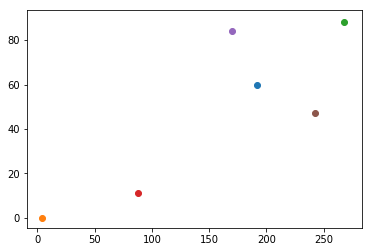

In [10]:
names = {'DH': 'DiJon', 'LN': 'Lindsay', 'AO': 'Aaron', 'LK': 'Lisa',
         'KH': 'Kristen','RM': 'Rusty'}
for i in set(new_df['Rig Operator']):
    try:
        print names[i], len(new_df[new_df['Rig Operator'] == i]), 'cells and', len(new_df[(new_df['Rig Operator'] == i) & (new_df['has_reconstruction'] == True)]), 'morphologies'
        fill_rate = round(len(new_df[(new_df['Rig Operator'] == i) & (new_df['has_reconstruction'] == True)])/float(len(new_df[new_df['Rig Operator'] == i])),2)*100
        print names[i], 'fill rate', fill_rate, '%'
        plt.scatter(len(new_df[new_df['Rig Operator'] == i]), len(new_df[(new_df['Rig Operator'] == i) & (new_df['has_reconstruction'] == True)]))
    except KeyError:
        pass
    

In [11]:
new_df['structure_acronym'] = None
for i in range(len(new_df)):
    new_df['structure_acronym'].iloc[i] = new_df['structure'].iloc[i]['acronym']

In [12]:
new_df['layers'] = None
layers = ['1','2/3','4','5','6']
for i, area in enumerate(new_df['structure_acronym']):
    for layer in layers:
        if layer in area:
            new_df['structure_acronym'].iloc[i] = area.split(layer)[0]
            new_df['layers'].iloc[i] = layer
            pass

In [13]:
lines = ['Cux2-CreERT2','Nr5a1-Cre','Nr5a1-Cre','Scnn1a-Tg2-Cre','Rorb-IRES2-Cre',
         'Scnn1a-Tg3-Cre','Rbp4-Cre_KL100','Ctgf-T2A-dgCre','Ntsr1-Cre_GN220','Slc17a6-IRES-Cre',
         'Ndnf-IRES2-dgCre','Chat-IRES-Cre-neo','Pvalb-IRES-Cre','Sst-IRES-Cre',
         'Htr3a-Cre_NO152','Vip-IRES-Cre','Gad2-IRES-Cre']
structures = ['AUDpo','VISpor','VISal','VISpl','VISl','VISli','VISp',
              'VISrl','VISa','VISam','VISpm','RSPd', 'RSPagl']

In [14]:
matrix = np.zeros((len(lines),len(structures)))
for i, cre in enumerate(lines):
    for j, area in enumerate(structures):
        matrix[i,j] = len(new_df[(new_df['transgenic_line'] == cre) & (new_df['structure_acronym'] == area)])

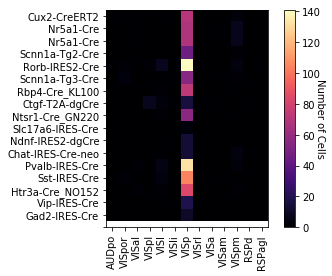

In [15]:
plt.imshow(matrix, cmap='magma', interpolation = 'nearest')
cbar = plt.colorbar(plt.imshow(matrix, cmap='magma', interpolation = 'nearest'))
cbar.set_label('Number of Cells', rotation = 270)
plt.yticks(np.arange(0,len(set(new_df['transgenic_line']))),lines)
plt.xticks(np.arange(0,len(set(new_df['structure_acronym']))),structures, rotation = 90)

plt.show()

In [16]:
matrix_l = np.zeros((len(set(new_df['layers'])),len(lines)))
for i, cre in enumerate(np.unique(new_df['layers'])):
    for j, line in enumerate(lines):
        matrix_l[i,j] = len(new_df[(new_df['layers'] == cre) & (new_df['transgenic_line'] == line)])

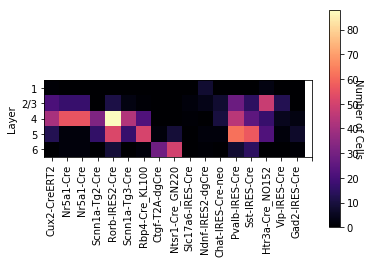

In [17]:
plt.imshow(matrix_l, cmap='magma', interpolation = 'nearest')
cbar = plt.colorbar(plt.imshow(matrix_l, cmap='magma', interpolation = 'nearest'))
cbar.set_label('Number of Cells', rotation = 270)
plt.xticks(np.arange(0,len(set(new_df['transgenic_line']))),lines, rotation = 90)
plt.yticks(np.arange(0,len(set(new_df['layers']))),np.unique(new_df['layers']))
plt.ylabel('Layer')

plt.show()

In [18]:
new_df = new_df[new_df['Rig Operator'].notnull()]
new_df = new_df[new_df['Rig Operator'] != "LN"]
matrix_2 = np.zeros((len(np.unique(new_df['Rig Operator'])),len(lines)))
for i, cre in enumerate(np.unique(new_df['Rig Operator'])):
    for j, line in enumerate(lines):
        matrix_2[i,j] = float(len(new_df[(new_df['Rig Operator'] == cre) & (new_df['transgenic_line'] == line)]))/len(new_df[new_df['Rig Operator'] == cre])*100

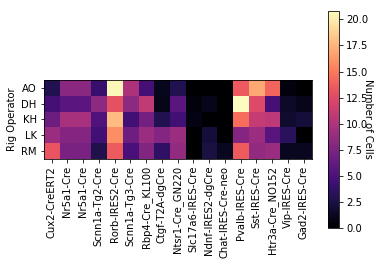

In [19]:
plt.imshow(matrix_2, cmap='magma', interpolation = 'nearest')
cbar = plt.colorbar(plt.imshow(matrix_2, cmap='magma', interpolation = 'nearest'))
cbar.set_label('Number of Cells', rotation = 270)
plt.xticks(np.arange(0,len(set(new_df['transgenic_line']))),lines, rotation = 90)
plt.yticks(np.arange(0,len(set(new_df['Rig Operator']))),np.unique(new_df['Rig Operator']))
plt.ylabel('Rig Operator')

plt.show()